# Clustering avec K-Means

## Introduction

Le **clustering** ou "classification non supervisée" consiste à diviser un ensemble de données en un certain nombre de groupes homogènes, de sorte que les données de chaque sous-ensemble partagent des caractéristiques communes, qui correspondent le plus souvent à des critères de proximité (similarité) que l'on définit.

Cette tâche de Machine Learning est utile lorsqu'on veut comprendre et catégoriser un grand ensemble de données sur lequel on a pas de vision claire.

Dans le monde de l’entreprise, on rencontre ce sous-domaine du machine learning à travers, par exemple, la segmentation de clients qui permet de comprendre et mieux cibler les clients. 
Un autre cas d’usage correspond à la détection de valeurs aberrantes et plus particulièrement la détection de fraudes ou d'anomalies, que ce soit dans les transports en commun, les transactions bancaires ou encore au sujet de la consommation électrique… Les applications sont nombreuses.

## K-Means


**K-means** est un algorithme non supervisé de clustering. Il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront  dans un même cluster. Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance). Une même observation ne pourra donc appartenir à deux clusters différents.

In [1]:
from scipy.spatial.distance import euclidean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets
from sklearn.cluster import KMeans

from ipywidgets import IntSlider, HBox, VBox, Button

from bqplot import (
    LogScale, LinearScale, OrdinalColorScale, ColorAxis,
    Axis, Scatter, Lines, CATEGORY10, Label, Figure, Tooltip
)

/home/paulsoule/.virtualenvs/formation_ds_kmeans/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Les données

Nous allons considérer que nous avons les données de 40 utilisateurs de trains
Pour ces 40 usagers, nous connaissons:
- Leur degré de satisfaction (une note sur 10)
- La fréquence d'achats de billets de train par mois = la somme de tous les achats pour une année divisée par 12

Nous souhaitons mieux connaître ces clients à partir de ces deux features.
C'est pourquoi nous allons essayer de les segmenter en plusieurs catégories de manière à avoir des groupes de clients qui ont les mêmes caractéristiques et pour lesquels nous allons pouvoir proposer des services ou des communications personnalisés.
Nous allons donc essayer d'extraire des connaissances pour tenter de relever des sous-ensembles de données difficiles à identifier à l’œil nu.

Voici à quoi ressemble nos données:

In [2]:
data = pd.read_csv('data_clustering.csv')
data.head()

,Satisfaction,Fréquence d’achats par mois
0,4,0.47
1,6,1.52
2,5,0.81
3,7,1.51
4,4,2.86


Ensuite, nous allons simplement afficher nos données dans un espace à 2 dimensions (puisque nous n'avons que 2 features)

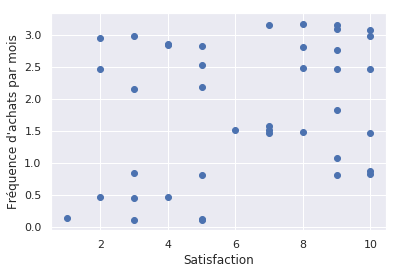

In [3]:
plt.scatter(data['Satisfaction'], data['Fréquence d’achats par mois'])
plt.xlabel('Satisfaction')
plt.ylabel("Fréquence d'achats par mois")
plt.show()

## Regroupement en 2 clusters

Nous allons demander à K-Means de nous segmenter les clients en 2 groupes qui ont les mêmes caractéristiques

In [4]:
x = data.copy()

In [5]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Après 300 itérations le modèle a défini les 2 catégories

In [6]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

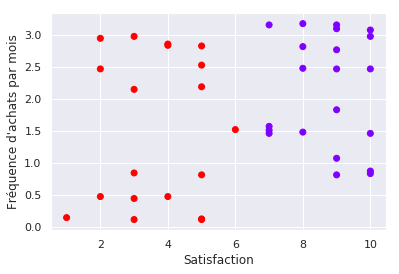

In [7]:
plt.scatter(clusters['Satisfaction'], clusters['Fréquence d’achats par mois'], c = clusters['cluster_pred'], cmap = 'rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Fréquence d'achats par mois")
plt.show()

# Normalisation des données

Nous avons l'impression ici que la "Satisfaction" est choisie comme critère de regroupement et que la fréquence d'achats a été négligée. 

En effet, l'algorithme "K-Means" estime la distance entre deux points en fonction de la différence entre les valeurs sur chacun des critères (distance Euclidienne). Le critère "Satisfaction" ayant de beaucoup plus grandes valeurs que la fréquence d'achats, ce premier critère pèse beaucoup plus dans la pondération.

C'est pourquoi nous devons mettre les données à l'échelle en les normalisant afin que les deux données aient une pondération égale.

Nous ne pouvons pas négliger la "Fréquence d'achats par mois", car elle joue un rôle important dans les analyses de la segmentation du marché.

In [8]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
#x_scaled

/home/paulsoule/.virtualenvs/formation_ds_kmeans/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


Une fois normalisées, voici à quoi ressemble nos données:

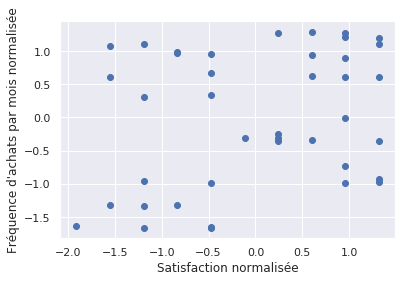

In [9]:
plt.scatter(x_scaled[:,0], x_scaled[:,1])
plt.xlabel('Satisfaction normalisée')
plt.ylabel("Fréquence d'achats par mois normalisée")
plt.show()

******************************************************************************************************************

# DEMO: Choisir K : le nombre de clusters

Choisir un nombre de cluster K n’est pas forcément intuitif. Surtout quand le jeu de données est grand et qu’on n’a pas des hypothèses sur les données. 
**Un nombre K grand peut conduire à un partitionnement trop fragmenté des données**. Ce qui empêchera de découvrir des patterns intéressants dans les données. 
Par contre, **un nombre de clusters trop petit**, peut conduire à avoir, potentiellement, **des clusters trop généralistes** contenant beaucoup de données. Dans ce cas, on n’aura pas de patterns “fins” à découvrir.

Pour un même jeu de données, il n’existe pas un unique clustering possible. La difficulté résidera donc à choisir un nombre de cluster K qui permettra de mettre en lumière des patterns intéressants entre les données. 

In [10]:
initial_k = 0

In [11]:
blobs = x_scaled

In [12]:
x_sc = LinearScale(min=int(blobs[:,0].min()-2), max=int(blobs[:,0].max()+2))
y_sc = LinearScale(min=int(blobs[:,1].min()-2), max=int(blobs[:,1].max()+2))
c_sc = OrdinalColorScale(domain=np.arange(10).tolist(), colors=CATEGORY10[:6])

In [13]:
ax_y = Axis(label='y', scale=y_sc, orientation='vertical', side='left', grid_lines='solid')
ax_x = Axis(label='x', scale=x_sc, grid_lines='solid')

In [14]:
scat = Scatter(x=blobs[:,0],
               y=blobs[:,1],
               scales={'x': x_sc, 'y': y_sc, 'color': c_sc}, color=[1])

In [15]:
scat_centroids = Scatter(x=[0], y=[0], scales={"x": x_sc, "y": y_sc}, colors=["black"])

In [25]:
fig = Figure(marks=[scat, scat_centroids], title='K-means', animation_duration=10, axes=[ax_x, ax_y], max_aspect_ratio=1.2)

In [26]:
k_slider = IntSlider(min=2,
                     max=10,
                     step=1,
                     description='Nombre de clusters',
                     value=initial_k)

In [27]:
def change_k(change):
    kmeans = KMeans(n_clusters=k_slider.value).fit(blobs)
    scat.color=kmeans.labels_
    scat_centroids.x = kmeans.cluster_centers_[:, 0]
    scat_centroids.y = kmeans.cluster_centers_[:, 1]

In [28]:
k_slider.observe(change_k, 'value')

In [29]:
VBox([HBox([k_slider]), fig])

Sur le graphe ci-dessus:
* Les points colorés sont les observations. Des observations de même couleur appartiennent aux mêmes clusters
* Les points noirs représentent les "centroïdes" de l'algorithme K-Means, il y en a un par cluster

******************************************************************************************************************

## La méthode Elbow (coude en anglais)

La méthode la plus usuelle pour choisir le nombre de clusters est de **lancer K-Means avec différentes valeurs de K** et de calculer la variance des différents clusters.  La variance est la somme des distances entre chaque centroid d’un cluster et les différentes observations inclues dans le même cluster. Ainsi, on cherche à trouver un nombre de clusters K de telle sorte que les clusters retenus minimisent la distance entre leurs centres (centroids) et les observations dans le même cluster. On parle de minimisation de la distance intra-classe.

In [21]:
wcss = []

for i in range(1,18):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
#wcss

Généralement, en mettant dans un graphique les différents nombres de clusters K en fonction de la variance, on retrouve un graphique similaire à celui-ci :

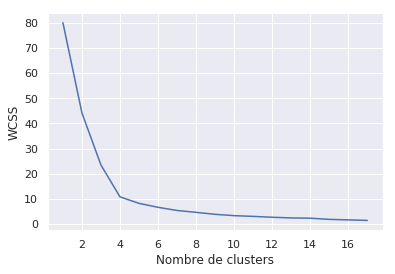

In [22]:
plt.plot(range(1,18), wcss)
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

On remarque sur ce graphique, la forme d’un bras où le point le plus haut représente l’épaule et le point où K vaut 16 représente l’autre extrémité : la main. 
Le nombre optimal de clusters est le point représentant **le coude**. Ici le coude peut être représenté par K valant 3 ou 4. C’est le **nombre optimal de clusters**. 
Généralement, le point du coude est celui du nombre de clusters à partir duquel la variance ne se réduit plus significativement. En effet, la “chute” de la courbe de variance  (distortion) entre 1 et 4 clusters est significativement plus grande que celle entre 5 clusters et 16 clusters.

Le fait de chercher le point représentant le coude, a donné nom à cette méthode : **La méthode Elbow** (coude en anglais).

D'après le graphique, nous avons décidé de fixer **K = 4**

In [23]:
kmeans_new = KMeans(4)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new.head()

,Satisfaction,Fréquence d’achats par mois,cluster_pred
0,4,0.47,1
1,6,1.52,3
2,5,0.81,1
3,7,1.51,3
4,4,2.86,2


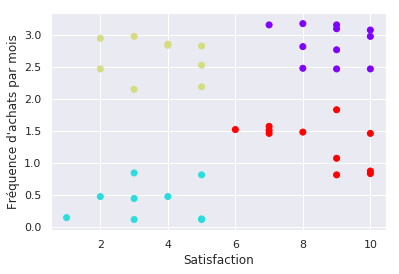

In [24]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Fréquence d’achats par mois'], c = cluster_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Fréquence d'achats par mois")
plt.show()

## Interprétation des différents clusters

À travers ce regroupement nous pouvons interpréter la segmentation de notre clientèle en **4 grandes catégrories**:

![](clustering.png)

1. Les points appartenant au groupe 1 (violet) désignent les personnes les moins satisfaites et les moins fidèles.

2. Les points du groupe 2 (vert) désignent des personnes très fidèles mais malheureusement moins satisfaites. On peut les qualifier de supporters

3. Les points bleus du groupe 3 sont des personnes loyales et très satisfaites. Nous pouvons les qualifier de fans.

4. Les points rouges du groupe 4 désignent des personnes un peu au milieu: ils sont satisfaits mais pas très fidèles.

Une fois l'interprétation des cluster effectuée, nous pourrons se donner comme objectif d'avoir le plus de personnes possibles dans la catégorie des fans. Nous pourrions mieux cibler les clients en fonction de leur catégorie. Par exemple nous pourrons plus aisément transformer le groupe de supporters en fans en visant d'améliorer leur niveau de satisfaction.
Quant au groupe 4, nous pourrons envisager par exemple de leur offrir des codes promo pour les encouarger à prendre le train plus régulièrement...